# Importing libraries and packages

In [320]:
import gym
import numpy as np
import sys

if "../" not in sys.path:
  sys.path.append("../") 

from lib.envs.cliff_walking import CliffWalkingEnv

In [324]:
%matplotlib inline

import gym
import itertools
import matplotlib
import numpy as np
import pandas as pd
import sys


if "../" not in sys.path:
  sys.path.append("../") 

from collections import defaultdict
from lib import plotting

matplotlib.style.use('ggplot')

Representation of Cliffwalking iterative environment

In [325]:
environ = CliffWalkingEnv()

print(environ.reset())
env.render()

print(environ.step(0))
env.render()

print(environ.step(1))
env.render()

print(environ.step(1))
env.render()

print(environ.step(2))
env.render()

36
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x

(24, -1.0, False, {'prob': 1.0})
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x

(25, -1.0, False, {'prob': 1.0})
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x

(26, -1.0, False, {'prob': 1.0})
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x

(38, -100.0, True, {'prob': 1.0})
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x



In [326]:
environ = CliffWalkingEnv()

In [327]:
# Define the epsilon-greedy policy
def epsilon_greedy(Q_values, epsilon, num_actions):
    
    # Define the policy function that takes an observation as input and returns a probability distribution over actions
    def policy(observation):
        
        # Initialize the probability distribution over actions to be uniform
        action_probability = np.ones(num_actions, dtype=float) * epsilon / num_actions
        
        # Choose the best action based on the current Q-values
        best_action = np.argmax(Q_values[observation])
        
        # Increase the probability of choosing the best action by (1 - epsilon)
        action_probability[best_action] += (1.0 - epsilon)
        
        # Return the probability distribution over actions
        return action_probability
    
    # Return the policy function
    return policy


Q-Learning grid search for all the combinations of given hyperparameters:

Training with discount_factor=0.9, alpha=0.1, epsilon=0.1
Episode 1000/1000.Training with discount_factor=0.9, alpha=0.1, epsilon=0.5
Episode 1000/1000.Training with discount_factor=0.9, alpha=0.1, epsilon=0.9
Episode 1000/1000.Training with discount_factor=0.9, alpha=0.5, epsilon=0.1
Episode 1000/1000.Training with discount_factor=0.9, alpha=0.5, epsilon=0.5
Episode 1000/1000.Training with discount_factor=0.9, alpha=0.5, epsilon=0.9
Episode 1000/1000.Training with discount_factor=0.9, alpha=0.9, epsilon=0.1
Episode 1000/1000.Training with discount_factor=0.9, alpha=0.9, epsilon=0.5
Episode 1000/1000.Training with discount_factor=0.9, alpha=0.9, epsilon=0.9
Episode 1000/1000.Training with discount_factor=0.95, alpha=0.1, epsilon=0.1
Episode 1000/1000.Training with discount_factor=0.95, alpha=0.1, epsilon=0.5
Episode 1000/1000.Training with discount_factor=0.95, alpha=0.1, epsilon=0.9
Episode 1000/1000.Training with discount_factor=0.95, alpha=0.5, epsilon=0.1
Episode 1000/1000.Training

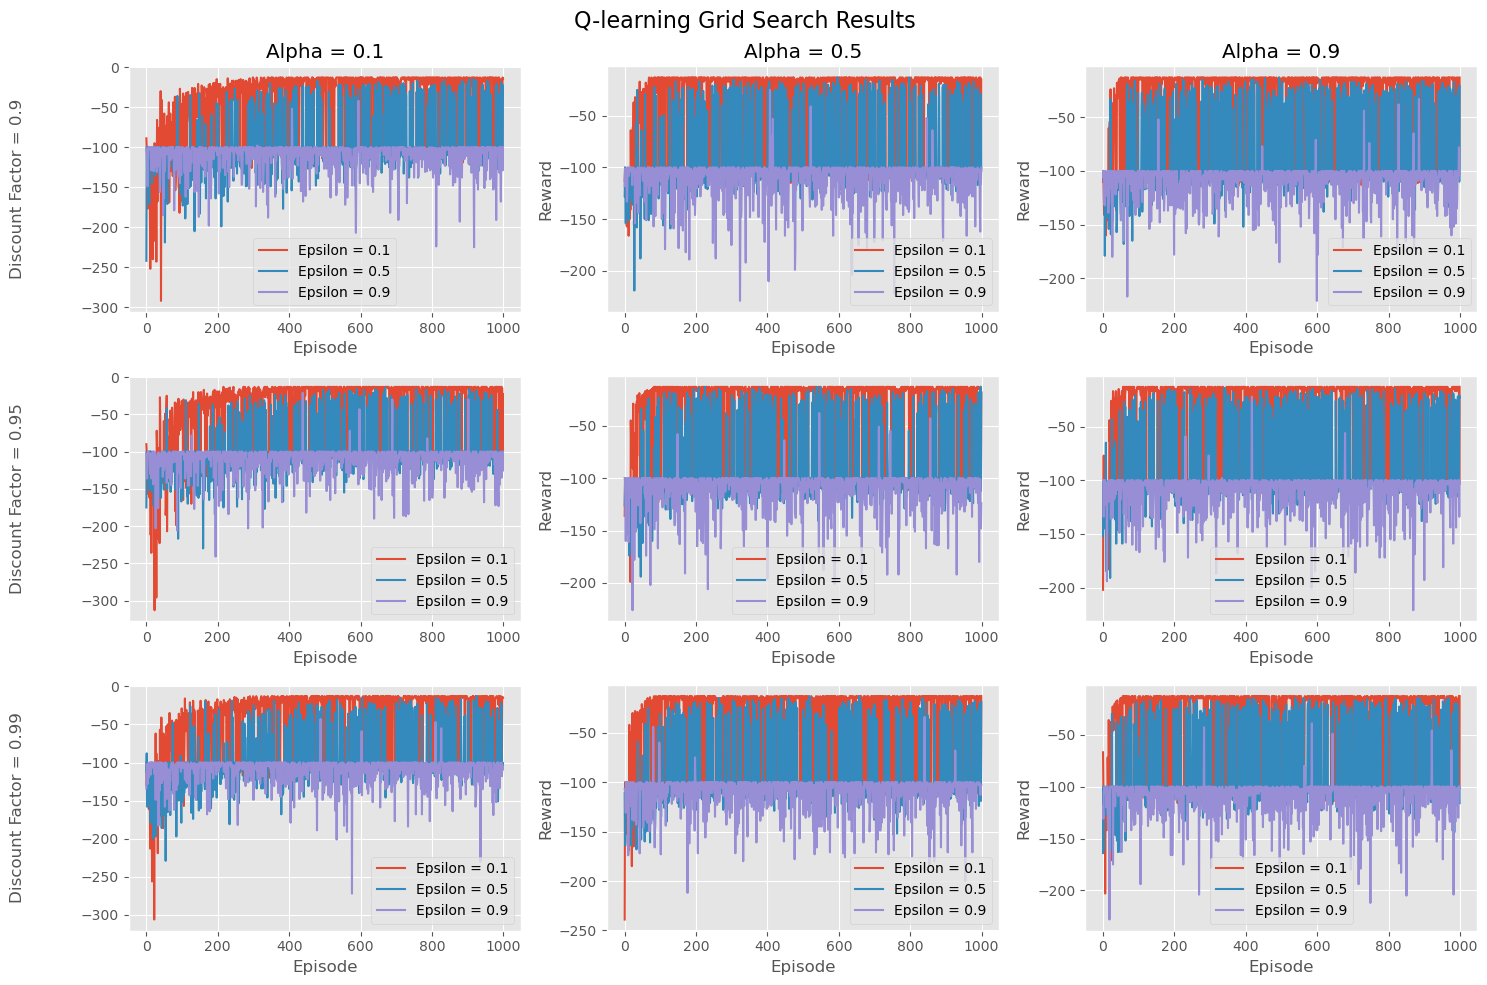

In [328]:
import matplotlib.pyplot as plt

discount_factors = [0.9, 0.95, 0.99]
alphas = [0.1, 0.5, 0.9]
epsilons = [0.1, 0.5, 0.9]
num_episodes = 1000

# Create a list of all possible combinations of hyperparameters
hyperparameter_combinations = list(itertools.product(discount_factors, alphas, epsilons))

# Initialize a dictionary to store the episode stats for each hyperparameter combination
episode_stats_dict = {}

# Create subplots for each combination of hyperparameters
fig, axs = plt.subplots(len(discount_factors), len(alphas), figsize=(15, 10))

# Plot episode rewards over time for each combination of hyperparameters
for i, discount_factor in enumerate(discount_factors):
    for j, alpha in enumerate(alphas):
        for k, epsilon in enumerate(epsilons):
            # Get the Q-learning results for the current hyperparameters
            print(f"Training with discount_factor={discount_factor}, alpha={alpha}, epsilon={epsilon}")
            Q, stats = q_learning(env, num_episodes=num_episodes, discount_factor=discount_factor, alpha=alpha, epsilon=epsilon)
            episode_stats_dict[(discount_factor, alpha, epsilon)] = stats
            
            # Plot the episode rewards over time
            axs[i, j].plot(stats.episode_rewards, label=f"Epsilon = {epsilon}")
            axs[i, j].set_xlabel("Episode")
            axs[i, j].set_ylabel("Reward")
            axs[i, j].legend()

# Set titles for each row and column
for ax, alpha in zip(axs[0], alphas):
    ax.set_title(f"Alpha = {alpha}")
for ax, discount_factor in zip(axs[:,0], discount_factors):
    ax.set_ylabel(f"Discount Factor = {discount_factor}", labelpad=40)
    
# Add overall title and legend
fig.suptitle("Q-learning Grid Search Results", fontsize=16)

plt.tight_layout()
plt.show()


In [329]:
# Print the best combination of hyperparameters based on the average reward per episode
best_hyperparameters = max(avg_rewards, key=avg_rewards.get)
print(f"Best hyperparameters: discount_factor={best_hyperparameters[0]}, alpha={best_hyperparameters[1]}, epsilon={best_hyperparameters[2]}")

# Print the average reward per episode for the best combination of hyperparameters
best_stats = episode_stats_dict[best_hyperparameters]
avg_reward = np.mean(best_stats.episode_rewards)
print(f"Average reward per episode for best hyperparameters: {avg_reward}")


Best hyperparameters: discount_factor=0.9, alpha=0.9, epsilon=0.1
Average reward per episode for best hyperparameters: -37.86


Implementing Q-learning on best hyperparameters combinations:

In [330]:
# Define the Q-learning algorithm
def q_learn(environ, num_eps, discount_factor=0.9, alpha=0.9, epsilon=0.1):

    # Initialize Q-values for all state-action pairs to 0
    Q_values = defaultdict(lambda: np.zeros(environ.action_space.n))

    # Initialize stats to keep track of episode lengths and rewards
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_eps),
        episode_rewards=np.zeros(num_eps))

    # Define the policy as an epsilon-greedy policy
    policy = epsilon_greedy(Q_values, epsilon, environ.action_space.n)

    # Loop over each episode
    for i_eps in range(num_eps):
        
        # Print the current episode number every 100 episodes
        if (i_eps + 1) % 100 == 0:
            print("\rEpisode {}/{}.".format(i_eps + 1, num_eps), end="")
            sys.stdout.flush()
        
        # Reset the environment to start a new episode
        state = environ.reset()
        
        # Loop over each time step in the episode
        for t_steps in itertools.count():
            
            # Choose an action based on the policy
            action_probability = policy(state)
            action = np.random.choice(np.arange(len(action_probability)), p=action_probability)
            
            # Take a step in the environment based on the chosen action
            next_state, reward, done, _ = environ.step(action)

            # Update the episode stats
            stats.episode_rewards[i_eps] += reward
            stats.episode_lengths[i_eps] = t_steps
            
            # Update the Q-value for the current state-action pair using TD learning
            best_action = np.argmax(Q_values[next_state])    
            td_updated = reward + discount_factor * Q_values[next_state][best_action]
            td_grad = td_updated - Q_values[state][action]
            Q_values[state][action] += alpha * td_grad
                
            # If the episode is done, break out of the time step loop
            if done:
                break
                
            # Update the current state to be the next state
            state = next_state
    
    # Return the learned Q-values and the episode stats
    return Q_values, stats


In [331]:
Q_values, q_learning_stats = q_learning(environ, 500)

Episode 500/500.

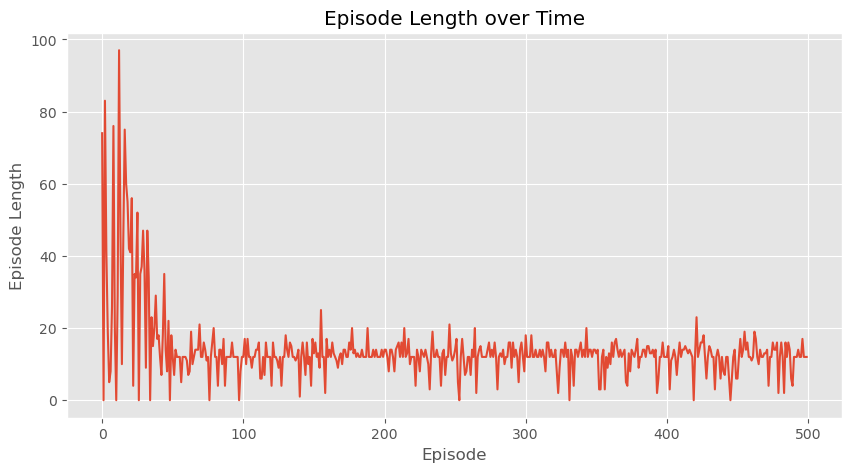

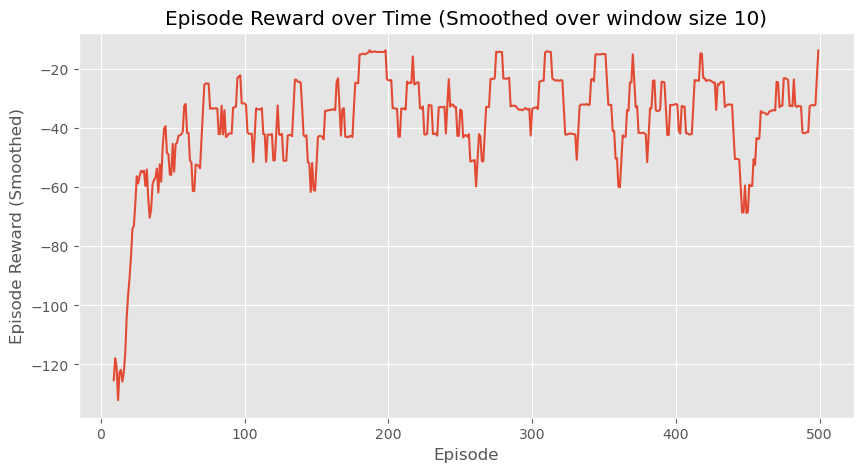

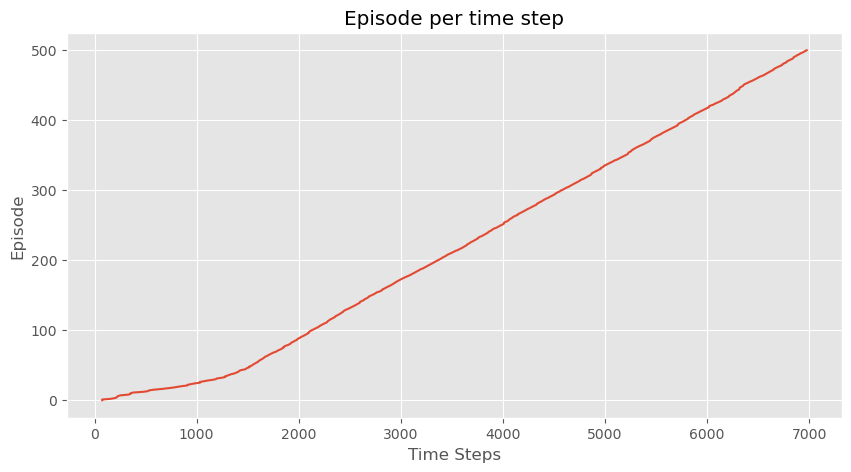

(<Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>)

In [332]:
plotting.plot_episode_stats(q_learning_stats)

# SARSA implementation

In [333]:
# Define the epsilon-greedy policy
def epsilon_greedy(Q_values, epsilon, num_actions):
    
    # Define the policy function that takes an observation as input and returns a probability distribution over actions
    def policy(observation):
        
        # Initialize the probability distribution over actions to be uniform
        action_probability = np.ones(num_actions, dtype=float) * epsilon / num_actions
        
        # Choose the best action based on the current Q-values
        best_action = np.argmax(Q_values[observation])
        
        # Increase the probability of choosing the best action by (1 - epsilon)
        action_probability[best_action] += (1.0 - epsilon)
        
        # Return the probability distribution over actions
        return action_probability
    
    # Return the policy function
    return policy


In [334]:
# Define the range of hyperparameters
discount_factors = [0.9, 0.95, 0.99]
alphas = [0.1, 0.5, 0.9]
epsilons = [0.01, 0.1, 0.5]

# Store the results in a dictionary
results = {}

# Perform grid search
for discount_factor, alpha, epsilon in itertools.product(discount_factors, alphas, epsilons):
    # Run SARSA algorithm with current hyperparameters
    Q, stats = sarsa(env, num_episodes, discount_factor=discount_factor, alpha=alpha, epsilon=epsilon)
    
    # Store the results
    results[(discount_factor, alpha, epsilon)] = (Q, stats)

# Find the best hyperparameters based on the average reward
best_hyperparams = None
best_avg_reward = float('-inf')

for hyperparams, (Q, stats) in results.items():
    avg_reward = np.mean(stats.episode_rewards)
    
    if avg_reward > best_avg_reward:
        best_hyperparams = hyperparams
        best_avg_reward = avg_reward

# Print the best hyperparameters and average reward
print("Best hyperparameters:", best_hyperparams)
print("Average reward for best hyperparmeters:", best_avg_reward)


Episode 1000/1000.Best hyperparameters: (0.99, 0.5, 0.01)
Average reward for best hyperparmeters: -18.587


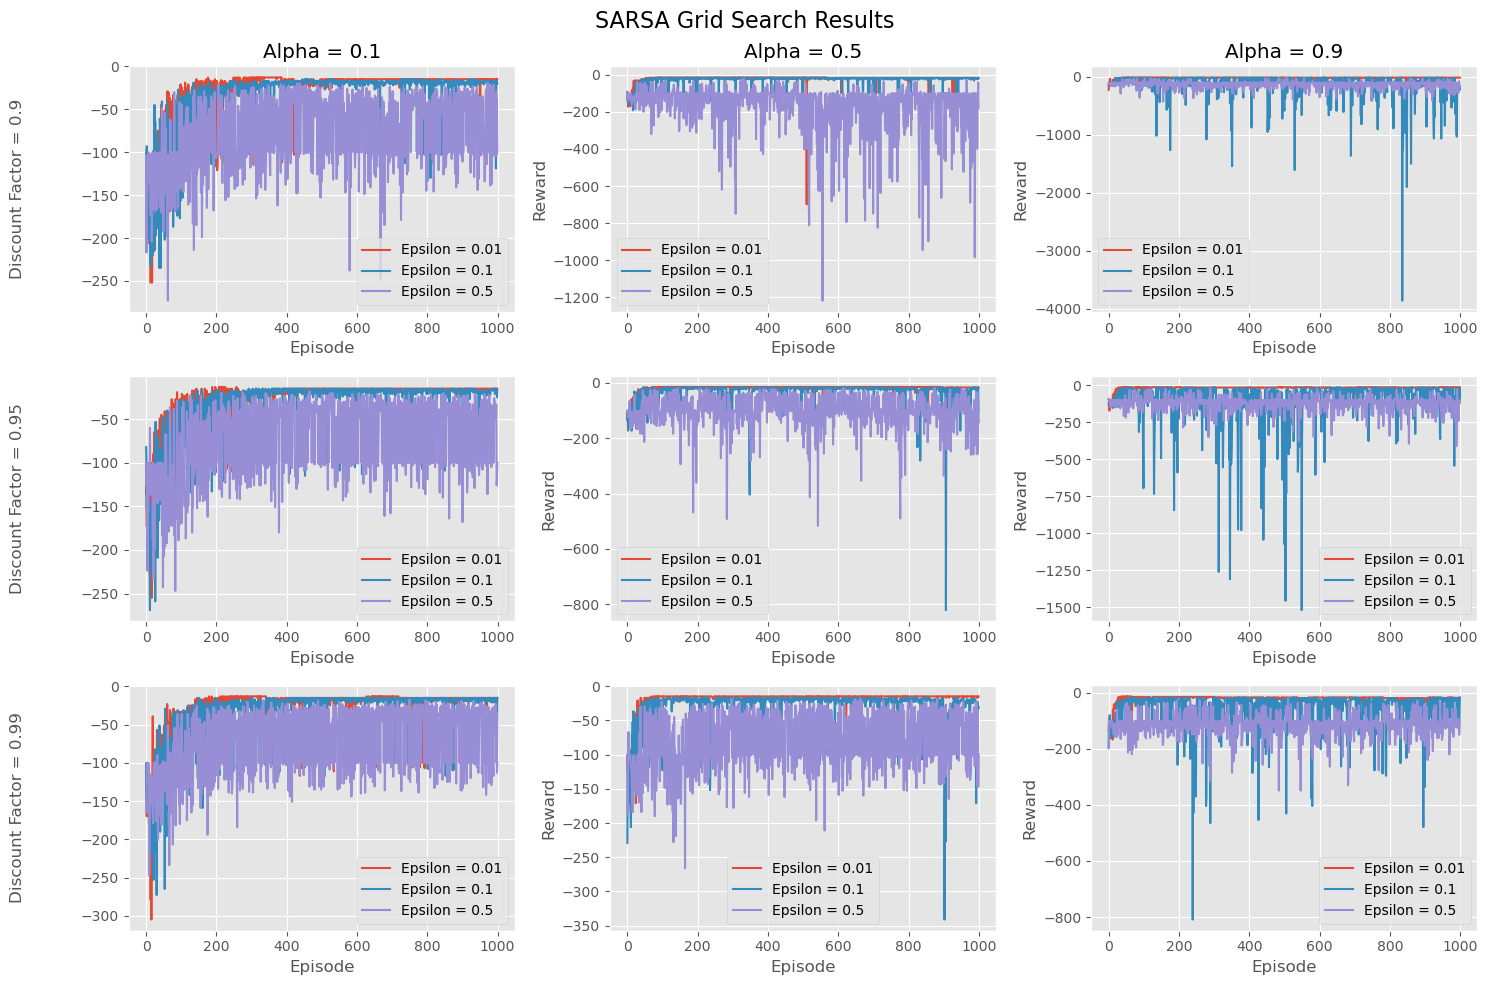

In [335]:
# Create subplots for each combination of hyperparameters
fig, axs = plt.subplots(len(discount_factors), len(alphas), figsize=(15, 10))

# Plot episode rewards over time for each combination of hyperparameters
for i, discount_factor in enumerate(discount_factors):
    for j, alpha in enumerate(alphas):
        for k, epsilon in enumerate(epsilons):
            # Get the SARSA results for the current hyperparameters
            Q_values, stats = results[(discount_factor, alpha, epsilon)]
            
            # Plot the episode rewards over time
            axs[i, j].plot(stats.episode_rewards, label=f"Epsilon = {epsilon}")
            axs[i, j].set_xlabel("Episode")
            axs[i, j].set_ylabel("Reward")
            axs[i, j].legend()

# Set titles for each row and column
for ax, alpha in zip(axs[0], alphas):
    ax.set_title(f"Alpha = {alpha}")
for ax, discount_factor in zip(axs[:,0], discount_factors):
    ax.set_ylabel(f"Discount Factor = {discount_factor}", labelpad=40)
    
# Add overall title and legend
fig.suptitle("SARSA Grid Search Results", fontsize=16)

plt.tight_layout()
plt.show()


Implementing SARSA on best hyperparameters combinations:

In [336]:
# First, we import the necessary libraries and define the SARSA function
def sarsa(environ, num_eps, discount_factor=0.9, alpha=0.5, epsilon=0.01):

# Initialize Q values to zero for all state-action pairs
    Q_values = defaultdict(lambda: np.zeros(environ.action_space.n))

# Create a statistics object to keep track of episode lengths and rewards
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_eps),
        episode_rewards=np.zeros(num_eps))

# Define a policy that selects actions based on epsilon-greedy selection of Q-values
    policy = epsilon_greedy(Q_values, epsilon, environ.action_space.n)

# Loop over each episode
    for i_eps in range(num_eps):
    
    # Print progress every 100 episodes
        if (i_eps + 1) % 100 == 0:
            print("\rEpisode {}/{}.".format(i_eps + 1, num_eps), end="")
            sys.stdout.flush()
    
    # Reset the environment and select the initial action
        state = environ.reset()
        action_probability = policy(state)
        action = np.random.choice(np.arange(len(action_probability)), p=action_probability)
    
        # Loop over each step in the episode
        for t_steps in itertools.count():
        
            # Take a step in the environment and select the next action
            next_state, reward, done, _ = environ.step(action)
            next_action_probability = policy(next_state)
            next_action = np.random.choice(np.arange(len(next_action_probability)), p=next_action_probability)
        
            # Update the statistics object
            stats.episode_rewards[i_eps] += reward
            stats.episode_lengths[i_eps] = t_steps
        
            # Calculate the TD target and TD gradient
            td_updated = reward + discount_factor * Q_values[next_state][next_action]
            td_grad = td_updated - Q_values[state][action]
        
            # Update the Q-value for the current state-action pair
            Q_values[state][action] += alpha * td_grad

            # If the episode is over, break out of the loop
            if done:
                break
            
            # Set the current state and action to the next state and action
            action = next_action
            state = next_state        

    # Return the final Q-values and statistics object
    return Q_values, stats


In [337]:
Q_values, sarsa_stats = sarsa(env, 500)

Episode 500/500.

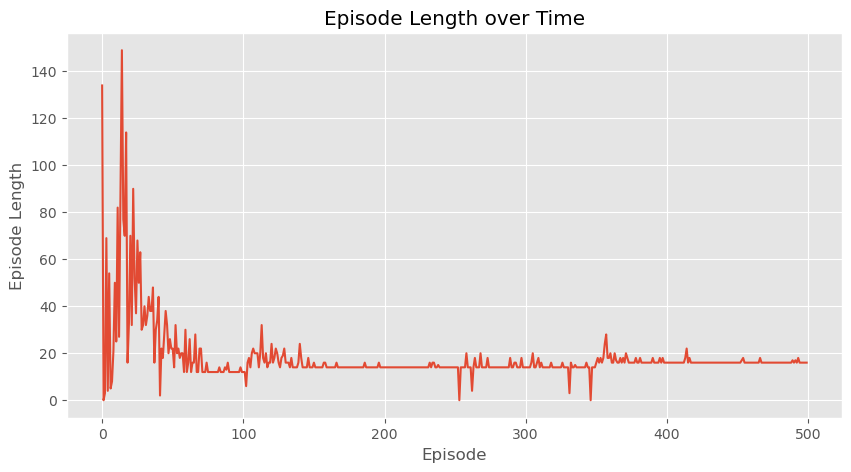

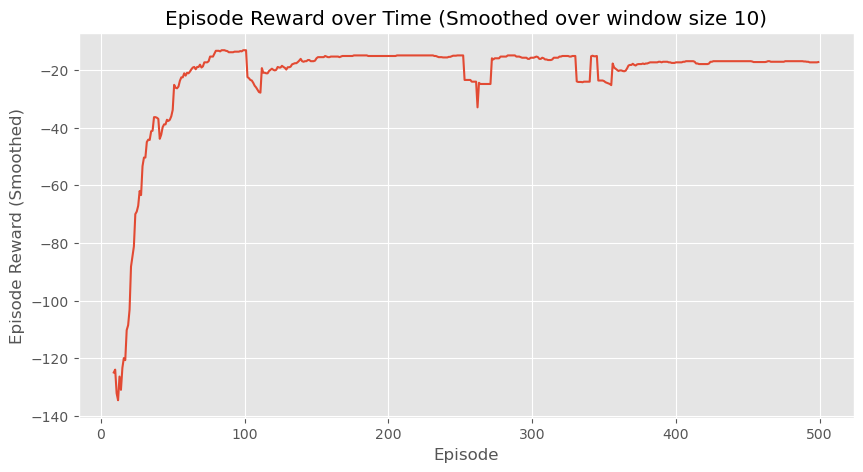

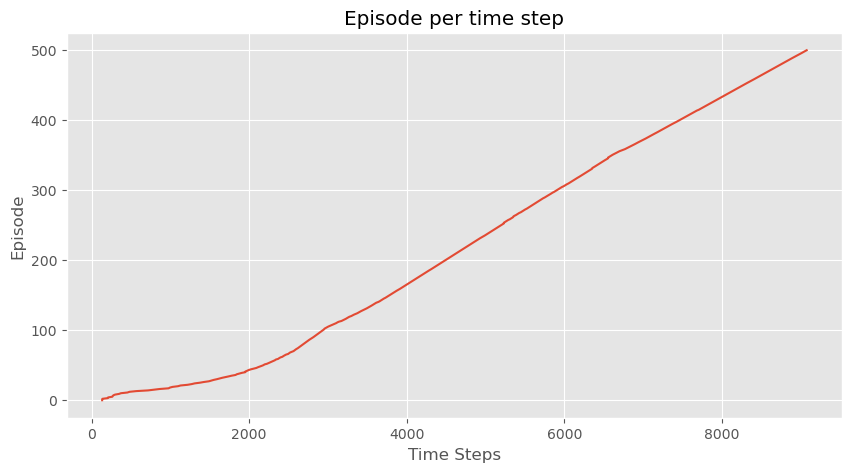

(<Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>)

In [338]:
plotting.plot_episode_stats(sarsa_stats)

# Comparison of performances of Q-Learning and SARSA

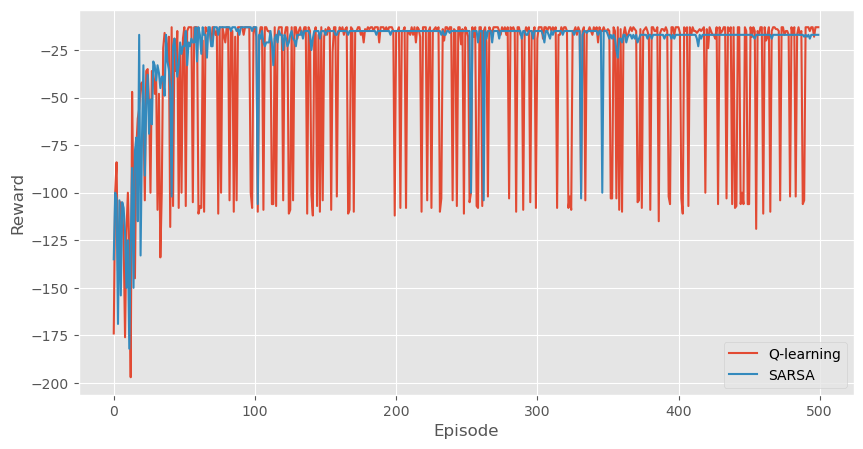

In [339]:
import matplotlib.pyplot as plt

# Plot the episode rewards over time for Q-learning and SARSA algorithms
plt.figure(figsize=(10,5))
plt.plot(q_learning_stats.episode_rewards, label='Q-learning')
plt.plot(sarsa_stats.episode_rewards, label='SARSA')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.show()
